# Import Librairies

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np

# Import Dataset

In [7]:
# monter le disque googleDrive
drive.mount('/content/drive')
#%cd /content/drive/Shareddrives/Ecole\ IA\ 4 Bordeaux/Partage\ Etudiants/       # PATH TO SHARED DRIVE
%cd /content/drive/MyDrive/Colab Notebooks/Data/Simplon_brief

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/Data/Simplon_brief


In [7]:
data = pd.read_csv("Data/billionaire_list_20yrs.csv")
data.info()
print(data.shape)
data.drop_duplicates(['name','annual_income'], inplace=True)
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352369 entries, 0 to 352368
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Unnamed: 0             352369 non-null  int64 
 1   name                   352369 non-null  object
 2   last_name              341519 non-null  object
 3   age                    352369 non-null  int64 
 4   gender                 340477 non-null  object
 5   time                   352369 non-null  int64 
 6   permanent_country      304678 non-null  object
 7   company                326869 non-null  object
 8   main_industry          352369 non-null  object
 9   wealth_source_details  341447 non-null  object
 10  industry               352320 non-null  object
 11  state                  159190 non-null  object
 12  headquarters           133655 non-null  object
 13  countries              352369 non-null  object
 14  annual_income          352369 non-null  int64 
 15  

In [8]:
# ouvre le fichier
data = pd.read_csv("Billionaires Statistics Dataset.csv")
data_2022 = pd.read_csv("2022_forbes_billionaires.csv")
data_2021 = pd.read_csv("Billionaire2021.csv")
data_2020 = pd.read_csv("Forbes_Billionaires2020.csv")

In [11]:


data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               2095 non-null   int64  
 1   Name               2095 non-null   object 
 2   Net Worth          2095 non-null   object 
 3   Age                2052 non-null   float64
 4   Country/Territory  2095 non-null   object 
 5   Source             2095 non-null   object 
 6   Industries         2095 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 114.7+ KB


In [12]:
data_2020 = data_2020[['Name','Net Worth']].rename(columns={'Name': 'personName'})
data_2021 = data_2021[['Name','NetWorth']].rename(columns={'Name': 'personName'})
data_2022 = data_2022[['name','networth']].rename(columns={'name': 'personName'})

In [13]:
#process columns for name
def process_name(x):
  return x.capitalize()
data.personName = data.personName.apply(process_name)
data_2022.personName = data_2022.personName.apply(process_name)
data_2022.personName = data_2022.personName.apply(lambda x: x.strip())
data_2021.personName = data_2021.personName.apply(process_name)
data_2020.personName = data_2020.personName.apply(process_name)

In [14]:
# process columns for wealth
def process_worth(x):
  return float(x[1:].replace('B',''))
data_2020['Net Worth'] = data_2020['Net Worth'].apply(process_worth)
data_2021.NetWorth = data_2021.NetWorth.apply(process_worth)
data_2022.networth = data_2022.networth.apply(process_worth)
data.finalWorth = data.finalWorth/1000

In [20]:
e = data[['personName','finalWorth']].merge(data_2022, on=['personName'], how='left')\
                                                  .merge(data_2021, on=['personName'], how='left')\
                                                  .merge(data_2020, on=['personName'], how='left')

e.columns=['nom','2023','2022','2021','2020']
e

,nom,2023,2022,2021,2020
0,Bernard arnault & family,211.0,158.0,150.0,76.0
1,Elon musk,180.0,219.0,151.0,24.6
2,Jeff bezos,114.0,171.0,177.0,113.0
3,Larry ellison,107.0,106.0,93.0,59.0
4,Warren buffett,106.0,118.0,96.0,67.5
...,...,...,...,...,...
2658,Yu rong,1.0,1.1,1.5,1.2
2659,"Richard yuengling, jr.",1.0,NaN,1.4,1.1
2660,Zhang gongyun,1.0,NaN,1.3,NaN
2661,Zhang guiping & family,1.0,1.3,1.7,1.2


<Axes: >

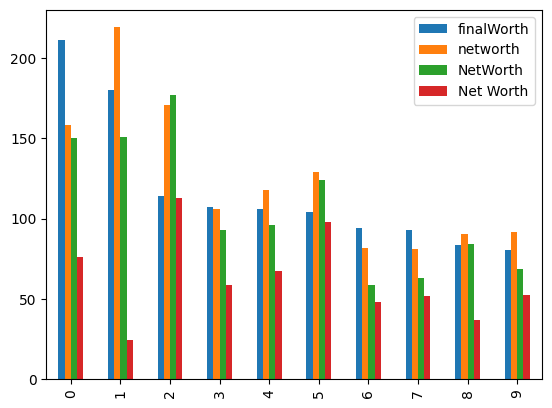

In [105]:
most_10_wealth = data.sort_values(by='finalWorth', ascending=False)['personName'][:10].values
e.loc[e.personName.isin(most_10_wealth)].plot.bar()

# Analyse préliminaire

In [53]:
data.finalWorth.apply(lambda x : x[1:].replace(',',''))

TypeError: ignored

In [48]:
data.gdp_country
data.groupby('country')['finalWorth','gdp_country'].agg({'finalWorth':'sum','gdp_country':'std'})

<ipython-input-48-43ada34e09ca>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('country')['finalWorth','gdp_country'].agg({'finalWorth':'sum','gdp_country':'std'})


ValueError: ignored

In [95]:
data.groupby('firstName')['firstName'].value_counts().sort_values()

firstName          firstName        
A. Jayson          A. Jayson             1
Pauline MacMillan  Pauline MacMillan     1
Paul-Heinz         Paul-Heinz            1
Paul Tudor         Paul Tudor            1
Patrizio           Patrizio              1
                                        ..
Thomas             Thomas               19
Richard            Richard              21
Michael            Michael              28
David              David                36
John               John                 40
Name: firstName, Length: 1770, dtype: int64

In [107]:
def tranche_age(age):
  if age <= 30:
    return '- 30'
  elif age <= 40:
    return '30-40'
  elif age <= 50:
    return '40-50'
  elif age <= 60:
    return '50-60'
  elif age <= 70:
    return '60-70'
  elif age <= 80:
    return '70-80'
  else:
    return '80 +'

data['tranche_age'] = data.age.apply(lambda x: tranche_age(x))

<Axes: xlabel='tranche_age'>

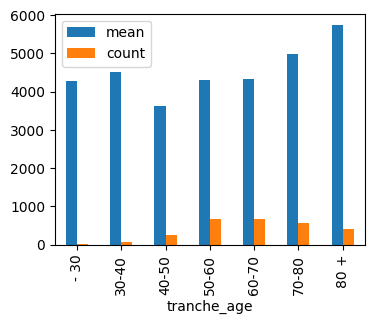

In [113]:
data.groupby('tranche_age')['finalWorth'].agg(['mean','count']).plot.bar(figsize=(4,3))

In [114]:
data.groupby('tranche_age')['firstName'].count()

tranche_age
- 30      15
30-40     69
40-50    239
50-60    678
60-70    660
70-80    572
80 +     404
Name: firstName, dtype: int64

In [77]:
# mettre date et birthdate en format datetime
data['birthDate'] = pd.to_datetime(data['birthDate'])
data['date'] = pd.to_datetime(data['date'])

<Axes: ylabel='Frequency'>

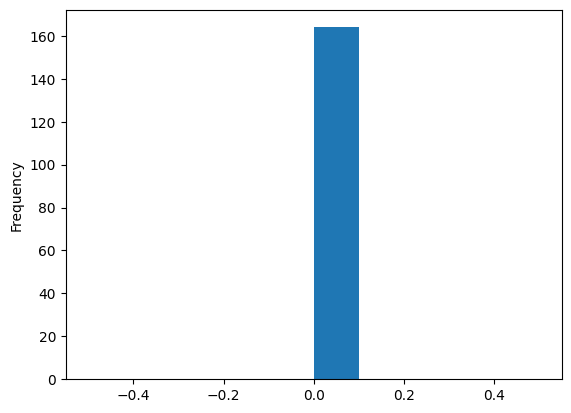

In [89]:
# changer type de gdp country en numerique
data.gdp_country = data.gdp_country.apply(lambda x: str(x).replace(',',''))
data.gdp_country = data.gdp_country.apply(lambda x: int(x.replace('nan','0').strip('$')))
country_no_gtp = data.loc[data.gdp_country==0, 'country'].unique()     # there are country with gdp not indicated
data.loc[data.country.isin(country_no_gtp), 'gdp_country'].plot.hist() # none of these have gdp so we can't

In [8]:
for col in data.columns:
  if data[col].isnull().sum() > 0:
    print(f"{col}  \t\t\t=> {data[col].isnull().sum()} valeurs nulles")

age  			=> 65 valeurs nulles
country  			=> 38 valeurs nulles
city  			=> 72 valeurs nulles
organization  			=> 2315 valeurs nulles
birthDate  			=> 76 valeurs nulles
firstName  			=> 3 valeurs nulles
title  			=> 2301 valeurs nulles
state  			=> 1887 valeurs nulles
residenceStateRegion  			=> 1893 valeurs nulles
birthYear  			=> 76 valeurs nulles
birthMonth  			=> 76 valeurs nulles
birthDay  			=> 76 valeurs nulles
cpi_country  			=> 184 valeurs nulles
cpi_change_country  			=> 184 valeurs nulles
gdp_country  			=> 164 valeurs nulles
gross_tertiary_education_enrollment  			=> 182 valeurs nulles
gross_primary_education_enrollment_country  			=> 181 valeurs nulles
life_expectancy_country  			=> 182 valeurs nulles
tax_revenue_country_country  			=> 183 valeurs nulles
total_tax_rate_country  			=> 182 valeurs nulles
population_country  			=> 164 valeurs nulles
latitude_country  			=> 164 valeurs nulles
longitude_country  			=> 164 valeurs nulles


In [9]:
"""for a,b in zip(data.age,2023-pd.to_datetime(data.birthDate).dt.year):
  if a != b:
    print("age",a,"  calculated",b)"""

'for a,b in zip(data.age,2023-pd.to_datetime(data.birthDate).dt.year):\n  if a != b:\n    print("age",a,"  calculated",b)'

In [27]:
data_countries = data.loc[:,data.columns.str.endswith('country')]

In [10]:
data.loc[data.tax_revenue_country_country.isnull(),]

TypeError: ignored

In [ ]:
data.loc[data.age != 2022 - pd.to_datetime(data.birthDate).dt.year, ['age','birthDate']]

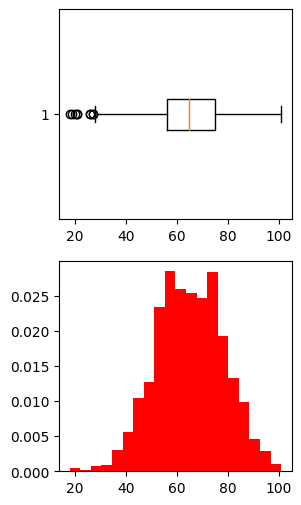

In [28]:
import matplotlib.pyplot as plt

to_plot = data.loc[~data.age.isnull()]         # filtrate out the data with no data
fig, ax = plt.subplots(2,1,figsize=(3,6))

ax[0].boxplot(to_plot.age, vert=False)
ax[1].hist(to_plot.age, bins=20, density=True, color='red')

plt.show()

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(2,1,figsize=(3,6))
sns.boxplot(x=to_plot.age, orient='h', ax=ax[0])
ax[0].set_title('Box Plot of Age')
ax[0].set_xlabel('Values')

# Histogram on the second subplot (ax[1) with blue bars and a red density curve
sns.histplot(data=to_plot.age, bins=20, kde=True, color='blue', ax=ax[1])
ax[1].set_title('Histogram of Age')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Frequency')

# Change the color of the density curve to red
ax[1].lines[0].set_color('red')

plt.show()

In [ ]:
Q1,Q3 = np.quantile(to_plot.age, [0.25,0.75])
IQ = Q3-Q1
flyers = Q1-1.5*IQ
data.loc[data['age'] <= flyers]

In [ ]:
data.describe()

In [ ]:
data.country.unique()

In [ ]:
to_plot['count'].values[0]

In [ ]:
# replace missing age value by the
data.loc[data.age.isnull() & data.birthDate.isnull(),"age"] = data.age.median()

to_plot_all = data.groupby('country')['rank','age'].agg(['count','median'])
to_plot = to_plot_all.age

#colors = ['red' if median_value > threshold else 'blue' for median_value in sorted_data]

colors = ['green' if val == 35 else 'red' if val > 50 else 'blue' for val in to_plot['count'].values]




to_plot['median'].sort_values(ascending=False).plot.barh(title='Age median par pays',
                                                         color=colors,
                                                         figsize=(3,12))
labels_ = [to_plot.index.values[i]+" - "+str(to_plot['count'].values[i]) for i in range(len(to_plot))]
plt.yticks(range(len(to_plot.index)), labels_)

plt.show()

In [ ]:
### MAKING A TOP 3 COUNTRY FOR AGES

# oldest age in what country?
data.loc[data.age.max(),'country']
# youngest age in what country?
data.loc[data.age.min(),'country']

# groupby country
age_by_country = data.groupby('country').agg({'rank':'count','age':'mean'}).sort_values(by='age')
# 3 yougest average in what country?
age_by_country[:3]
# oldest average in what country?
age_by_country[-3:]

In [ ]:
# giving no age the age of the median

In [ ]:
# comparaison F/H
data.gender.value_counts().plot.pie(autopct='%1.1f%%',
                                    title = 'Répartition par genre des Milliardaires',
                                    labels=['Hommes','Femmes'],
                                    colors=['b','r'])

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(3,6))
ax1 = fig.subplot()
ax1.plot.box(data.age)